In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
d.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
d.rename(columns={'fixed acidity':'fixedacidity'}, inplace = True)

In [5]:
d.head()

,fixedacidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#                       H0<=8  (Fixed Acidity)
#                       H1>8

In [14]:
d.describe()

,fixedacidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
sample_d = d.sample(150)

In [7]:
bootsample = sample_d.sample(150, replace  = True)

In [8]:
means = []
for _ in range(10000):
    bootsample = sample_d.sample(150, replace  = True)
    means.append(bootsample.fixedacidity.mean())
    

In [9]:
low, upper = np.percentile(means,2.5),np.percentile(means,97.5)

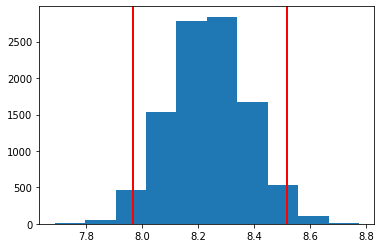

In [10]:
plt.hist(means);
plt.axvline(x = low, color = 'r', linewidth = 2)
plt.axvline(x = upper, color = 'r', linewidth = 2)

# Second Method for testing null hypothese

In [11]:
means2 = []
for _ in range(10000):
    bootsample2 = sample_d.sample(150, replace  = True)
    means2.append(bootsample2.fixedacidity.mean())
    

In [13]:
np.std(means2)

0.1394100276233783

In [18]:
null_vals = np.random.normal(8, np.std(means2) , 10000 )

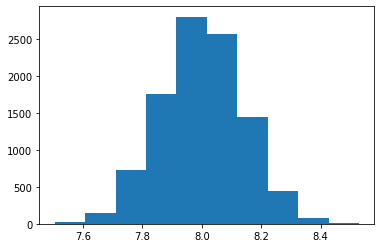

In [19]:
plt.hist(null_vals);

In [20]:
sample_d.fixedacidity.mean()

8.24